In [1]:
import os 
import cv2
import numpy as np
from PIL import Image

input_dir="data/images/"
mask="data/masks/"
desired_size    = 512 
output_dir="train" 

# iterate through the input directory
for image_file in os.listdir(input_dir):
    if image_file.endswith(".jpg"):
        print(image_file)

        #saving the path to image
        image_path = os.path.join(input_dir, image_file)
        
        # reading the images
        img = cv2.imread(image_path)

        # resize the image while preserving aspect ratio and adding padding
        height, width   =   img.shape[:2]
        max_dim         =   max(height, width)
        ratio           =   float(desired_size) / max_dim
        new_size        =   tuple([int(x * ratio) for x in (width, height)])
        resized_img     =   cv2.resize(img, (new_size[0], new_size[1]))

        # adding pad to the image to get consistent shape
        pad_w           =   desired_size - new_size[0]
        pad_h           =   desired_size - new_size[1]
        top, bottom     =   pad_h // 2, pad_h - (pad_h // 2)
        left, right     =   pad_w // 2, pad_w - (pad_w // 2)
        padded_img      =   cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # save the padded image
        output_image_path = os.path.join(output_dir,  image_file)
        cv2.imwrite(output_image_path, padded_img)        

1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
i1.jpg
i2.jpg
i3.jpg
i4.jpg
i5.jpg
i6.jpg


In [2]:
import os 
import cv2
import numpy as np
from PIL import Image

input_dir       =   "data/masks/"
desired_size    =   512 
output_dir      =   "mask" 

# iterate through the input directory
for image_file in os.listdir(input_dir):
    if image_file.endswith(".png"):
        print(image_file)

        #saving the path to image
        image_path = os.path.join(input_dir, image_file)
        
        # reading the images
        img = cv2.imread(image_path)

        # resize the image while preserving aspect ratio and adding padding
        height, width   =   img.shape[:2]
        max_dim         =   max(height, width)
        ratio           =   float(desired_size) / max_dim
        new_size        =   tuple([int(x * ratio) for x in (width, height)])
        resized_img     =   cv2.resize(img, (new_size[0], new_size[1]))

        # adding pad to the image to get consistent shape
        pad_w           =   desired_size - new_size[0]
        pad_h           =   desired_size - new_size[1]
        top, bottom     =   pad_h // 2, pad_h - (pad_h // 2)
        left, right     =   pad_w // 2, pad_w - (pad_w // 2)
        padded_img      =   cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

        # save the padded image
        output_image_path = os.path.join(output_dir,  image_file)
        cv2.imwrite(output_image_path, padded_img)        

1.png
10.png
11.png
12.png
13.png
14.png
15.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
i1.png
i2.png
i3.png
i4.png
i5.png
i6.png


In [3]:
input_dir="mask/"
x="mask_prep/"
for image_file in os.listdir(input_dir):
    if image_file.endswith(".png"):
        
        #saving the path to image
        image_path = os.path.join(input_dir, image_file)
        
        # reading the images
        img = np.array(Image.open(image_path))
        
        # Create an empty image with the same size
        width, height = 512, 512
        mask = np.zeros((height, width), dtype=np.uint8)  # Initialize with 0 (representing background)

        mask[np.all(img == [255, 255, 255], axis=2)] = 1

        temp=os.path.join(x,image_file[:-4] + ".png")
        cv2.imencode('.png', mask)[1].tofile(temp)

In [1]:
from keras_segmentation.models.unet import resnet50_unet

model = resnet50_unet(n_classes=2 ,  input_height=512, input_width=512)

In [8]:
train="train"
mask="mask_prep"

model.train(
    train_images =  "train",
    train_annotations = "mask_prep",
    checkpoints_path = "checkpoints" , epochs= 4 )

Verifying train dataset


100%|██████████| 21/21 [00:00<00:00, 214.81it/s]

Dataset verified! 
Starting Epoch  0


512/512 [==============================] - 103s 192ms/step - loss: 0.2925 - accuracy: 0.9166
saved  checkpoints.model.0
Finished Epoch 0
Starting Epoch  1
512/512 [==============================] - 100s 195ms/step - loss: 0.2735 - accuracy: 0.9259
saved  checkpoints.model.1
Finished Epoch 1
Starting Epoch  2
512/512 [==============================] - 99s 194ms/step - loss: 0.2584 - accuracy: 0.9320
saved  checkpoints.model.2
Finished Epoch 2
Starting Epoch  3
512/512 [==============================] - 99s 193ms/step - loss: 0.2441 - accuracy: 0.9368
saved  checkpoints.model.3
Finished Epoch 3


1/1 [==============================] - 0s 35ms/step


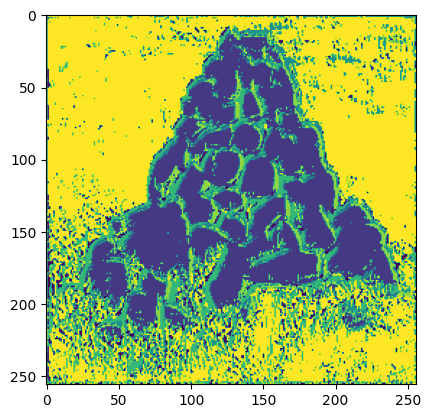

1/1 [==============================] - 0s 32ms/step


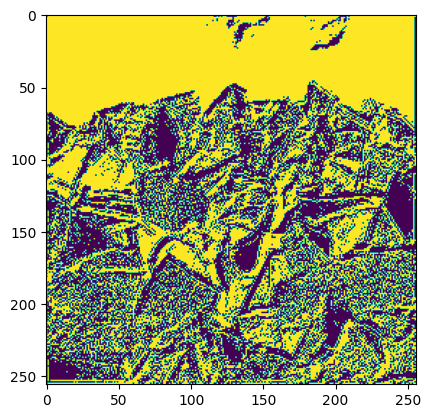

In [4]:
out = model.predict_segmentation(
    inp="7.jpg",
    out_fname="out.png")

import matplotlib.pyplot as plt
plt.imshow(out)

In [2]:
import tensorflow as tf
# Create a checkpoint object
checkpoint = tf.train.Checkpoint(model=model)

# Restore the model from the checkpoint
checkpoint_path = 'checkpoints.3'
checkpoint.restore(checkpoint_path)


1/1 [==============================] - 0s 41ms/step


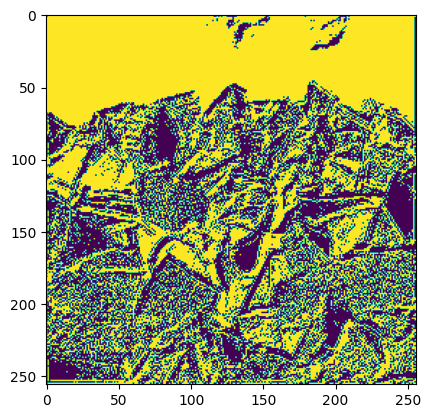

In [6]:
out = model.predict_segmentation(
    inp="7.jpg",
    out_fname="out.png")

import matplotlib.pyplot as plt
plt.imshow(out)